# Initial EDA for Washington Databreach Dataframe

## Imports & Initial
***

### Imports

In [202]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [203]:
# imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
from random import choices
import datetime as dt
import dataframe_image as dfi
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns

In [204]:
# pandas formatting
pd.options.display.float_format = '{:.0f}'.format

### Read csv and turn into pandas dataframe.

In [205]:
databreach_df = pd.read_csv('../data/WA_Databreach_20231102.csv')
databreach_df.head()

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
0,09/20/2017 12:00:00 AM,11/15/2017 12:00:00 AM,Theft or Mistake,09/20/2017 12:00:00 AM,09/20/2017 12:00:00 AM,Western State Hospital,9750,NaN,515,Health,...,0,0,0,0,True,0,NaN,True,56,0
1,11/15/2016 12:00:00 AM,11/21/2017 12:00:00 AM,Cyberattack,10/13/2016 12:00:00 AM,11/15/2016 12:00:00 AM,"Uber Technologies, Inc.",9752,NaN,10888,Business,...,1-99,0,33,33,True,33,NaN,True,371,1-99
2,NaN,11/27/2017 12:00:00 AM,Cyberattack,10/26/2016 12:00:00 AM,10/19/2017 12:00:00 AM,"Bulletproof 360, Inc.",9753,Malware,4077,Business,...,Unknown,NaN,NaN,NaN,False,358,NaN,False,NaN,300-399
3,09/06/2017 12:00:00 AM,12/01/2017 12:00:00 AM,Unauthorized Access,06/15/2016 12:00:00 AM,11/06/2017 12:00:00 AM,JAM Paper & Envelope,9754,NaN,590,Business,...,500+,61,448,509,True,509,NaN,False,86,500+
4,10/06/2017 12:00:00 AM,12/11/2017 12:00:00 AM,Cyberattack,07/01/2015 12:00:00 AM,10/06/2017 12:00:00 AM,"Combat Brands, LLC",9755,Malware,956,Business,...,500+,0,828,828,True,828,NaN,True,66,500+


### Get Information

In [206]:
databreach_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DateAware                          966 non-null    object 
 1   DateSubmitted                      990 non-null    object 
 2   DataBreachCause                    990 non-null    object 
 3   DateStart                          862 non-null    object 
 4   DateEnd                            804 non-null    object 
 5   Name                               990 non-null    object 
 6   Id                                 990 non-null    int64  
 7   CyberattackType                    649 non-null    object 
 8   WashingtoniansAffected             958 non-null    float64
 9   IndustryType                       990 non-null    object 
 10  BusinessType                       467 non-null    object 
 11  Year                               990 non-null    int64  

### Clean Dataframe

Steps:
1. Grab only necessary columns
2. Change DatabreachCause:Cyberattack, CyberattackType:NaN to DatabreachCause:Cyberattack, CyberattackType:Unreported
3. Adjust datetime columns

In [207]:
def to_datetime_date_helpfunction(dataframe):
            '''
            Inputs: dataframe

            Outputs: dataframe with all values in columns that have 'date' in their 
                                                        name as datetime.date objects    
            '''

            colsarray = dataframe.columns.values

            for x in colsarray:
                if 'Date' in x:
                    dataframe[f'{x}'] = pd.to_datetime(dataframe[f'{x}']).dt.date
            return

In [208]:
# Dataframe Cleaning

# Step 1
cleandf = databreach_df[['DateStart', 'DataBreachCause', 'CyberattackType', 'WashingtoniansAffected', 'IndustryType', 'BusinessType']]
# Step 2
cleandf.loc[:, 'CyberattackType'][(cleandf['DataBreachCause'] == 'Cyberattack') 
                                                & (cleandf['CyberattackType'].isnull())] = 'Unreported'
# Step 3
to_datetime_date_helpfunction(cleandf)

cleandf

C:\Users\RGBMonster\AppData\Local\Temp\ipykernel_18600\3979626997.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf.loc[:, 'CyberattackType'][(cleandf['DataBreachCause'] == 'Cyberattack')
C:\Users\RGBMonster\AppData\Local\Temp\ipykernel_18600\467911785.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'{x}'] = pd.to_datetime(dataframe[f'{x}']).dt.date


,DateStart,DataBreachCause,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType
0,2017-09-20,Theft or Mistake,NaN,515,Health,NaN
1,2016-10-13,Cyberattack,Unreported,10888,Business,Transportation
2,2016-10-26,Cyberattack,Malware,4077,Business,Consumable
3,2016-06-15,Unauthorized Access,NaN,590,Business,Manufacturing
4,2015-07-01,Cyberattack,Malware,956,Business,Fitness
...,...,...,...,...,...,...
985,2023-05-30,Cyberattack,Other,5886,Health,NaN
986,2022-08-01,Cyberattack,Other,2319,Business,Software
987,2023-01-12,Cyberattack,Ransomware,805,Business,Clothing
988,2023-05-29,Cyberattack,Other,978,Business,Other


## Functions for exploring df and tests:
***

### Functions:

In [209]:
def bootstrap(data, num_bootstrap_samples=10000):
   '''
   Inputs: Data of type array, series, list; Numerical

   Outputs: A list of bootstrap samples of data
   '''
   bootstrap_samples = []

   for i in range(num_bootstrap_samples):
      bootstrap_samples.append(choices(list(data), k=len(data)))

   return bootstrap_samples

In [210]:
def get_rate(dataframe, startdate, enddate, column, type):
    '''
    
    '''
    date_filtered = dataframe[(dataframe['DateStart'] > startdate) & (dataframe['DateStart'] < enddate)]
    grouped = date_filtered[[(f'{column}'),'WashingtoniansAffected']].groupby(f'{column}').sum()
    days = (enddate - startdate).days
    return days (grouped.loc[f'{type}'][0])/days

In [211]:
def get_bootstrapped_rates(dataframe, startdate, enddate, column, category, samples=10000):
    '''
    
    '''
    rates = []
    date_filtered = dataframe[(dataframe['DateStart'] > startdate) & (dataframe['DateStart'] < enddate)]
    column_selected = date_filtered[[(f'{column}'),'WashingtoniansAffected']]
    category_selected = column_selected[column_selected[f'{column}'] == category]
    category_selected = category_selected.dropna()
    bootstrap_affected = bootstrap(category_selected['WashingtoniansAffected'], samples)
    days = (enddate - startdate).days
    for x in bootstrap_affected:
        rates.append(sum(x)/days)
    return rates

In [212]:
def to_season(date):
    
    winter = ['Winter', 12, 1, 2]
    spring = ['Spring', 3, 4, 5]
    summer = ['Summer', 6, 7, 8]
    fall = ['Fall', 9, 10, 11]
    seasons = [winter, spring, summer, fall]
    for season in seasons:
        for month in season:
            if date.month == month:
                return season[0]

In [213]:
def rmse(true, predicted):
    mse = np.square(np.subtract(true, predicted)).mean()
    rmse = math.sqrt(mse)
    return rmse

In [214]:
def cross_val(X_train, y_train, k=5):
    kf = KFold(n_splits = k, shuffle=True, random_state = None)
    rmse_list = []
    i = 1

    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        model = LinearRegression()
        results = model.fit(X_train_fold, y_train_fold)
        predictions = results.predict(X_test_fold)
        print(f'train_fold{i} has an rmse of:{rmse(y_test_fold, predictions)}')
        i+=1
        rmse_list.append(rmse(y_test_fold, predictions))

    print(f'The mean rmse is: {np.mean(rmse_list)}')    

In [215]:
def test_hom_variance(means1, means2):

    hom_variance = None
    variance_ratio = np.std(means1)/np.std(means2)
    if variance_ratio > 3:
        hom_variance = False
    else:
        hom_variance = True

    return hom_variance

In [216]:
def plot_dist(category1, category2, means1, means2, bins1=10, bins2=10):
    fig,ax = plt.subplots()

    ax.hist(means1, bins=bins1, color='orange')
    ax.hist(means2, bins=bins2, color='green')

    ax.set_xlabel('Number affected')
    ax.set_ylabel('Samples')
    ax.legend([category1, category2])

    fig.savefig(f'../images/hypoth_test:{category1}&{category2}(individual)', bbox_inches='tight')

In [217]:
def hypothesis_test(dataframe, column, category1, category2, samples=10000, startdate = None, enddate=None, rate='n', alt='two-sided'):
        '''
        Inputs: pandas dataframe, 1 column and 2 categories that belong to said
                column to compare, number of resamples for bootstrap, start and end
                date for comparing rates, rate-option for comparing rates,
                alt for alt hypothesis in t-test.
        
        Outputs: t-test results and saved png dataframe image to images folder
        '''
        if rate == 'n':
                cat1 = dataframe[dataframe[f'{column}'] == f'{category1}']['WashingtoniansAffected']
                cat1 = cat1.dropna()
                cat2 = dataframe[dataframe[f'{column}'] == f'{category2}']['WashingtoniansAffected']
                cat2 = cat2.dropna()

                boot_cat1 = bootstrap(cat1, samples)
                boot_cat2 = bootstrap(cat2, samples)

                boot_cat1_means = []
                boot_cat2_means = []

                for boot in boot_cat1:
                        boot_cat1_means.append(np.mean(boot))

                for boot in boot_cat2:
                        boot_cat2_means.append(np.mean(boot))
  
                hom_variance = test_hom_variance(boot_cat1_means, boot_cat2_means)

                plot_dist(category1, category2, boot_cat1_means, boot_cat2_means)

                return st.ttest_ind(boot_cat1_means, boot_cat2_means, equal_var=hom_variance, alternative=alt)

        else:
                cat1_rates = get_bootstrapped_rates(dataframe, startdate, enddate, column, category1, samples)
                cat2_rates = get_bootstrapped_rates(dataframe, startdate, enddate, column, category2, samples)

                hom_variance = test_hom_variance(cat1_rates, cat2_rates)

                plot_dist(category1, category2, cat1_rates, cat2_rates)

                return st.ttest_ind(cat1_rates, cat2_rates, equal_var=hom_variance, alternative=alt)

In [218]:
def linear_regression(dataframe):
    grouped_years = dataframe[['ActualYears', 'WashingtoniansAffected']].groupby('ActualYears')
    num_affected = grouped_years.sum()
    num_incidents = grouped_years.count()
    num_incidents['Number Of Incidents'] = num_incidents['WashingtoniansAffected']
    num_incidents.drop('WashingtoniansAffected', axis=1, inplace=True)

    rate_over_time = (grouped_years.sum()/grouped_years.count())

    fig, ax = plt.subplots()
    ax.plot(num_affected)
    ax.set_title('Washingtonians Affected By Year')
    ax.set_ylabel('Number Affected(millions)')
    ax.set_xlabel('Years')
    fig.savefig(f'../images/affectedbyyear', bbox_inches='tight')

    fig, ax = plt.subplots()
    ax.plot(num_incidents)
    ax.set_title('Number of Incidents by Year')
    ax.set_ylabel('Number of Incidents')
    ax.set_xlabel('Years')
    fig.savefig(f'../images/incidentsbyyear', bbox_inches='tight')

    fig, ax = plt.subplots()
    ax.plot(rate_over_time)
    ax.set_title('Number Affected Per Incident by Year')
    ax.set_ylabel('Rates')
    ax.set_xlabel('Years')
    fig.savefig(f'../images/ratesbyyear', bbox_inches='tight')

    X = num_incidents['Number Of Incidents']
    y = num_affected['WashingtoniansAffected']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

    model = LinearRegression()
    model.fit(X_train,y_train)

    return model

In [219]:
def seasons(dataframe):
    grouped_seasons = dataframe[['Season','WashingtoniansAffected']].groupby('Season')
    grouped_seasons.sum()
    grouped_seasons.sum()['WashingtoniansAffected']

    fig, ax = plt.subplots()
    ax.pie(grouped_seasons.sum()['WashingtoniansAffected'], labels=grouped_seasons.sum()['WashingtoniansAffected'].index, autopct='%1.1f%%')
    fig.savefig(f'../images/seasons', bbox_inches='tight')

In [220]:
def create_display_model(dataframe):
    # getting relevant info
    grouped_years = dataframe[['ActualYears', 'WashingtoniansAffected']].groupby('ActualYears')
    # y
    num_affected = grouped_years.sum()
    # X
    num_incidents = grouped_years.count()
    num_incidents['Number Of Incidents'] = num_incidents['WashingtoniansAffected']
    num_incidents.drop('WashingtoniansAffected', axis=1, inplace=True)
    # declaring X and y for model
    X = num_incidents['Number Of Incidents']
    y = num_affected['WashingtoniansAffected']
    # creating model
    model = LinearRegression()
    model.fit(X_train,y_train)
    # put data back together for display
    num_affected['Num_incidents'] = num_incidents['Number Of Incidents']
    # display model
    # create fig, ax object and set ax to the regplot to allow saving
    fig, ax = plt.subplots()
    model_display = sns.regplot(data = num_affected, x='Num_incidents', y='WashingtoniansAffected', x_estimator=model)
    ax = model_display
    ax.set_title('Model Performance')
    # save
    fig.savefig('../images/model')

### Tests:

In [221]:
test_date = dt.date(2020, 9, 4)
to_season(test_date)

'Fall'

## Brainstorming
***

### Hypothesis Tests:

#### Industry Types

Government vs. Non-Profit/Charity

H0: Government mean affected <= Non-Profit/Charity mean affected

H1: Government mean affected > Non-Profit/Charity mean affected

In [222]:
nonprofit_affected = cleandf[cleandf['IndustryType'] == 'Non-Profit/Charity']['WashingtoniansAffected']
nonprofit_affected = nonprofit_affected.dropna()
government_affected = cleandf[cleandf['IndustryType'] == 'Government']['WashingtoniansAffected']
government_affected = government_affected.dropna()

In [223]:
# bootstrap samples and get means for each bootstrap
boot_gov_affected = bootstrap(government_affected, 5000)
gov_affected_bootmeans = []

for x in boot_gov_affected:
    gov_affected_bootmeans.append(np.mean(x))

# np.mean(gov_affected_bootmeans)
# fig,ax=plt.subplots()
# ax.hist(gov_affected_bootmeans, bins=12)
# ax.axvline(np.mean(gov_affected_bootmeans), color='r')

In [224]:
# bootstrap samples and get means for each bootstrap
boot_nonprofit_affected = bootstrap(nonprofit_affected, 5000)
nonprofit_affected_bootmeans = []

for x in boot_nonprofit_affected:
    nonprofit_affected_bootmeans.append(np.mean(x))

# np.mean(nonprofit_affected_bootmeans)
# fig,ax=plt.subplots()
# ax.hist(nonprofit_affected_bootmeans, bins=20)
# ax.axvline(np.mean(nonprofit_affected_bootmeans), color='r')

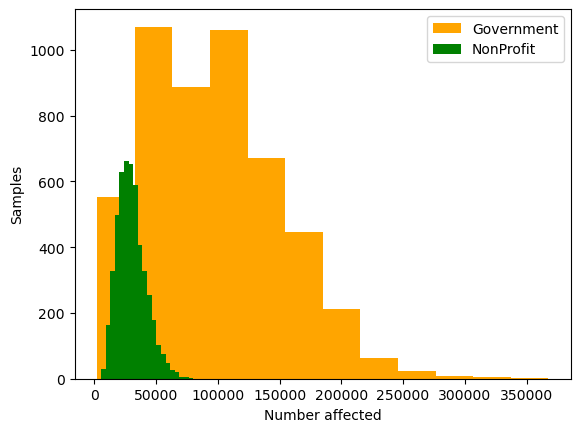

In [225]:
fig,ax=plt.subplots()

ax.hist(gov_affected_bootmeans, bins=12, color='orange')
# ax.axvline(np.mean(gov_affected_bootmeans), color='r')

ax.hist(nonprofit_affected_bootmeans, bins=20, color='green')
# ax.axvline(np.mean(nonprofit_affected_bootmeans), color='b')

ax.set_xlabel('Number affected')
ax.set_ylabel('Samples')

ax.legend(['Government', 'NonProfit'])
# fig.savefig(f'../images/data_stats', bbox_inches='tight')

In [226]:
np.std(gov_affected_bootmeans)/np.std(nonprofit_affected_bootmeans)

4.695227876531961

In [227]:
# ttest
st.ttest_ind(gov_affected_bootmeans, nonprofit_affected_bootmeans, equal_var=False, alternative='greater')

Ttest_indResult(statistic=85.07387171779203, pvalue=0.0)

#### Cyberattack Types

Phishing vs. Malware

H0: Phishing mean Affected <= Malware mean affected

H1: Phishing mean Affected > Malware mean affected

#### Rates

Government vs. Non-Profit/Charity

H0: Government mean rate >= Non-Profit/Charity mean rate

H1: Government mean rate < Non-Profit/Charity mean rate

Steps

1. Filter dates(start date), start and end
2. calculate number of days
3. pick categories
4. bootstrap
5. divide sum(number affected) by number of days
6. compare means of distribution of rates for chosen categories
7. answer hypothesis

In [228]:
start = dt.date(2018,1,1)
end = dt.date(2023,12,30)
gov_rates = get_bootstrapped_rates(cleandf, start, end, 'IndustryType', 'Government', 10000)
np.mean(gov_rates)

34.40475216994061

In [229]:
nonprof_rates = get_bootstrapped_rates(cleandf, start, end, 'IndustryType', 'Non-Profit/Charity', 10000)
np.mean(nonprof_rates)

1329.7031900411148

In [230]:
np.std(gov_rates)/np.std(nonprof_rates)

0.024015983416486725

In [231]:
# ttest
st.ttest_ind(gov_rates, nonprof_rates, equal_var=True, alternative='less')

Ttest_indResult(statistic=-251.66373920483454, pvalue=0.0)

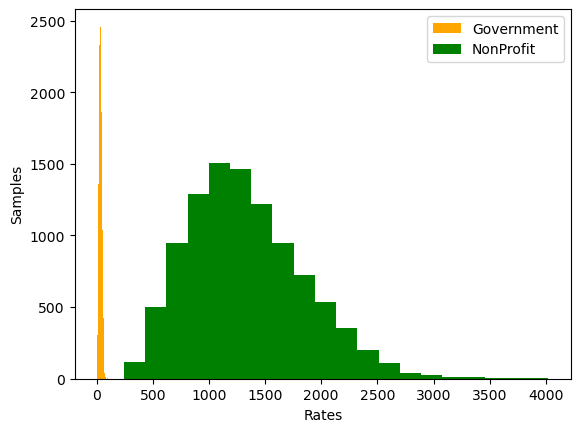

In [232]:
fig,ax=plt.subplots()

ax.hist(gov_rates, bins=12, color='orange')
# ax.axvline(np.mean(gov_rates), color='r')

ax.hist(nonprof_rates, bins=20, color='green')
# ax.axvline(np.mean(nonprof_rates), color='b')

ax.set_xlabel('Rates')
ax.set_ylabel('Samples')

ax.legend(['Government', 'NonProfit'])
# fig.savefig(f'../images/data_stats', bbox_inches='tight')

### Linear Regressions:

#### Affected Rate By Year

In [233]:
cleandf['ActualYears'] = [x.year for x in cleandf['DateStart']]

C:\Users\RGBMonster\AppData\Local\Temp\ipykernel_18600\719847916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['ActualYears'] = [x.year for x in cleandf['DateStart']]


In [234]:
# number of total affected per year
grouped_years = cleandf[['ActualYears', 'WashingtoniansAffected']].groupby('ActualYears')
# grouped_years.sum().plot()

In [235]:
# number of incidents per year
# grouped_years.count().plot()

In [236]:
# Number affected per incident rate
# (grouped_years.sum()/grouped_years.count()).plot()

2017 was another record year for cybercrime. According to the Online Trust Alliance (OTA), the number of cybersecurity incidents nearly doubled from the previous year.

The relationship here suggests that the affected per incident rate undergoes regular biannual fluctuations, which according to outside research is associated with the competing development between attack and defense vectors.

Can we use the count to predict the number affected? Will the number of incidents in a given year tell us what to expect?

In [237]:
num_affected = grouped_years.sum()

In [238]:
num_incidents = grouped_years.count()
num_incidents['Number Of Incidents'] = num_incidents['WashingtoniansAffected']
num_incidents.drop('WashingtoniansAffected', axis=1, inplace=True)

In [239]:
X = num_incidents['Number Of Incidents']

In [240]:
y = num_affected['WashingtoniansAffected']

In [241]:
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
res = model.resid

model.summary()

c:\Users\RGBMonster\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     WashingtoniansAffected   R-squared:                       0.767
Model:                                OLS   Adj. R-squared:                  0.748
Method:                     Least Squares   F-statistic:                     39.52
Date:                    Tue, 14 Nov 2023   Prob (F-statistic):           4.03e-05
Time:                            14:34:22   Log-Likelihood:                -210.12
No. Observations:                      14   AIC:                             424.2
Df Residuals:                          12   BIC:                             425.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.178e+04   3.14e+05      0.069      0.946   -6.63e+05    7.07e+05
Number Of Incidents  2.256e+04   3589.514      6.286      0.000    1.47e+04    3.04e+04
==============================================================================
Omnibus:                       15.527   Durbin-Watson:                   2.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.542
Skew:                           1.784   Prob(JB):                      0.00312
Kurtosis:                       5.656   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [243]:
X_train

,const,Number Of Incidents
ActualYears,,
2018,1,42
2023,1,108
2017,1,45
2014,1,8
2010,1,1
2021,1,152
2013,1,3
2019,1,63
2016,1,64


In [244]:
cross_val(X_train, y_train, 5)

train_fold1 has an rmse of:1491526.5745645592
train_fold2 has an rmse of:1207515.9464885232
train_fold3 has an rmse of:140156.97623053196
train_fold4 has an rmse of:471468.37889365986
train_fold5 has an rmse of:852924.1522672381
The mean rmse is: 832718.4056889025


In [245]:
X_test

,const,Number Of Incidents
ActualYears,,
2008,1,1


In [246]:
y_test

ActualYears
2008   1742
Name: WashingtoniansAffected, dtype: float64

In [247]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([50766.91711949])

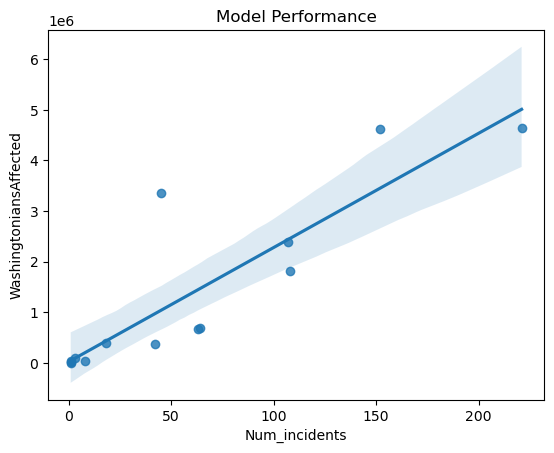

In [251]:
num_affected['Num_incidents'] = num_incidents['Number Of Incidents']
num_affected
fig, ax = plt.subplots()
model_display = sns.regplot(data = num_affected, x='Num_incidents', y='WashingtoniansAffected')
ax.set_title('Model Performance')
ax = model_display
fig.savefig('../images/model')

#### Seasons

In [ ]:
cleandf['Season'] = cleandf['DateStart'].apply(to_season)

C:\Users\RGBMonster\AppData\Local\Temp\ipykernel_18600\3670418968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf['Season'] = cleandf['DateStart'].apply(to_season)


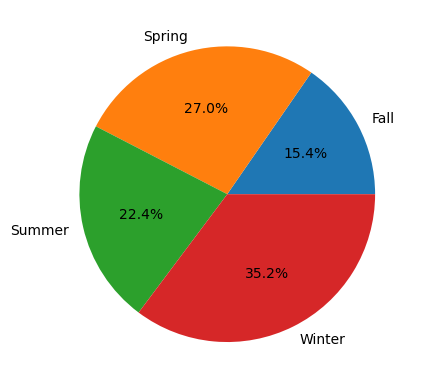

In [ ]:
grouped_seasons = cleandf[['Season','WashingtoniansAffected']].groupby('Season')
grouped_seasons.sum()
grouped_seasons.sum()['WashingtoniansAffected']

fig, ax = plt.subplots()
ax.pie(grouped_seasons.sum()['WashingtoniansAffected'], labels=grouped_seasons.sum()['WashingtoniansAffected'].index, autopct='%1.1f%%')
plt.show()

In [ ]:
cleandf

,DateStart,DataBreachCause,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,ActualYears,Season
0,2017-09-20,Theft or Mistake,NaN,515,Health,NaN,2017,Fall
1,2016-10-13,Cyberattack,Unreported,10888,Business,Transportation,2016,Fall
2,2016-10-26,Cyberattack,Malware,4077,Business,Consumable,2016,Fall
3,2016-06-15,Unauthorized Access,NaN,590,Business,Manufacturing,2016,Summer
4,2015-07-01,Cyberattack,Malware,956,Business,Fitness,2015,Summer
...,...,...,...,...,...,...,...,...
985,2023-05-30,Cyberattack,Other,5886,Health,NaN,2023,Spring
986,2022-08-01,Cyberattack,Other,2319,Business,Software,2022,Summer
987,2023-01-12,Cyberattack,Ransomware,805,Business,Clothing,2023,Winter
988,2023-05-29,Cyberattack,Other,978,Business,Other,2023,Spring


In [ ]:
model_df = cleandf[['Season', 'WashingtoniansAffected']].dropna()

In [ ]:
X = model_df[['Season']]
X = pd.get_dummies(X)
X.drop('Season_Winter', axis=1, inplace=True)
y = model_df['WashingtoniansAffected']

In [ ]:
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
res = model.resid

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     WashingtoniansAffected   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                 -0.003
Method:                     Least Squares   F-statistic:                    0.1727
Date:                    Tue, 14 Nov 2023   Prob (F-statistic):              0.915
Time:                            11:35:09   Log-Likelihood:                -11114.
No. Observations:                     834   AIC:                         2.224e+04
Df Residuals:                         830   BIC:                         2.225e+04
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.231e+04   8555.243      2.608      0.009    5518.188    3.91e+04
Season_Fall   -5218.2180   1.42e+04     -0.367      0.713   -3.31e+04    2.27e+04
Season_Spring  2196.2344   1.33e+04      0.165      0.869    -2.4e+04    2.84e+04
Season_Summer  6383.1630   1.49e+04      0.429      0.668   -2.28e+04    3.56e+04
==============================================================================
Omnibus:                     1732.580   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3401764.182
Skew:                          16.251   Prob(JB):                         0.00
Kurtosis:                     314.185   Cond. No.                         4.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""